Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.
Name of class present in dataset
 ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.4180 - loss: 1.8140 - val_accuracy: 0.7407 - val_loss: 0.7604
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7697 - loss: 0.6889 - val_accuracy: 0.8449 - val_loss: 0.4453
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8545 - loss: 0.4276 - val_accuracy: 0.9002 - val_loss: 0.3170
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8794 - loss: 0.3507 - val_accuracy: 0.9099 - val_loss: 0.2913
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9112 - loss: 0.2572 - val_accuracy: 0.9147 - val_loss: 0.2739
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9323 - loss: 0.2034 - val_accuracy: 0.8890 - val_loss: 0.3520
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9367 - loss: 0.1793 - val_accuracy: 0.9174 - val_loss: 0.2964
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9424 - loss: 0.1750 - val_accuracy: 0.93

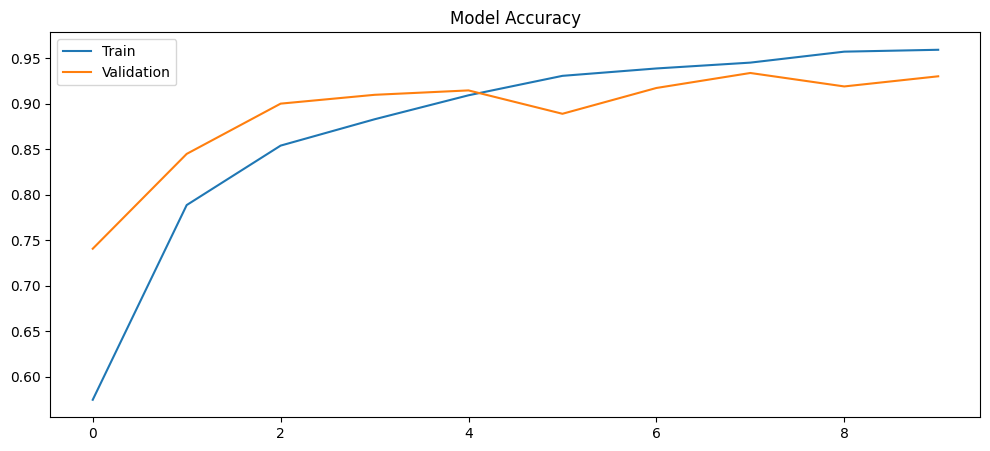

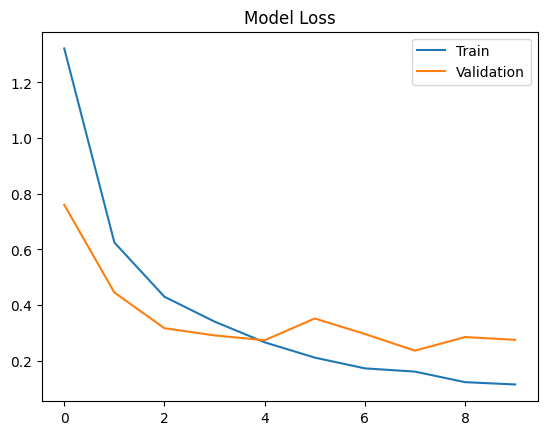



129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.91      0.88      0.90       176
                     Pepper__bell___healthy       0.93      0.97      0.95       280
                      Potato___Early_blight       0.96      0.96      0.96       194
                       Potato___Late_blight       0.93      0.89      0.91       224
                           Potato___healthy       0.70      0.79      0.74        29
                      Tomato_Bacterial_spot       0.98      0.95      0.97       414
                        Tomato_Early_blight       0.88      0.76      0.82       200
                         Tomato_Late_blight       0.88      0.91      0.89       369
                           Tomato_Leaf_Mold       0.84      0.95      0.89       208
                  Tomato_Septoria_leaf_spot       0.93      0.85      0.89       337
Tomato_Spider_mites_T

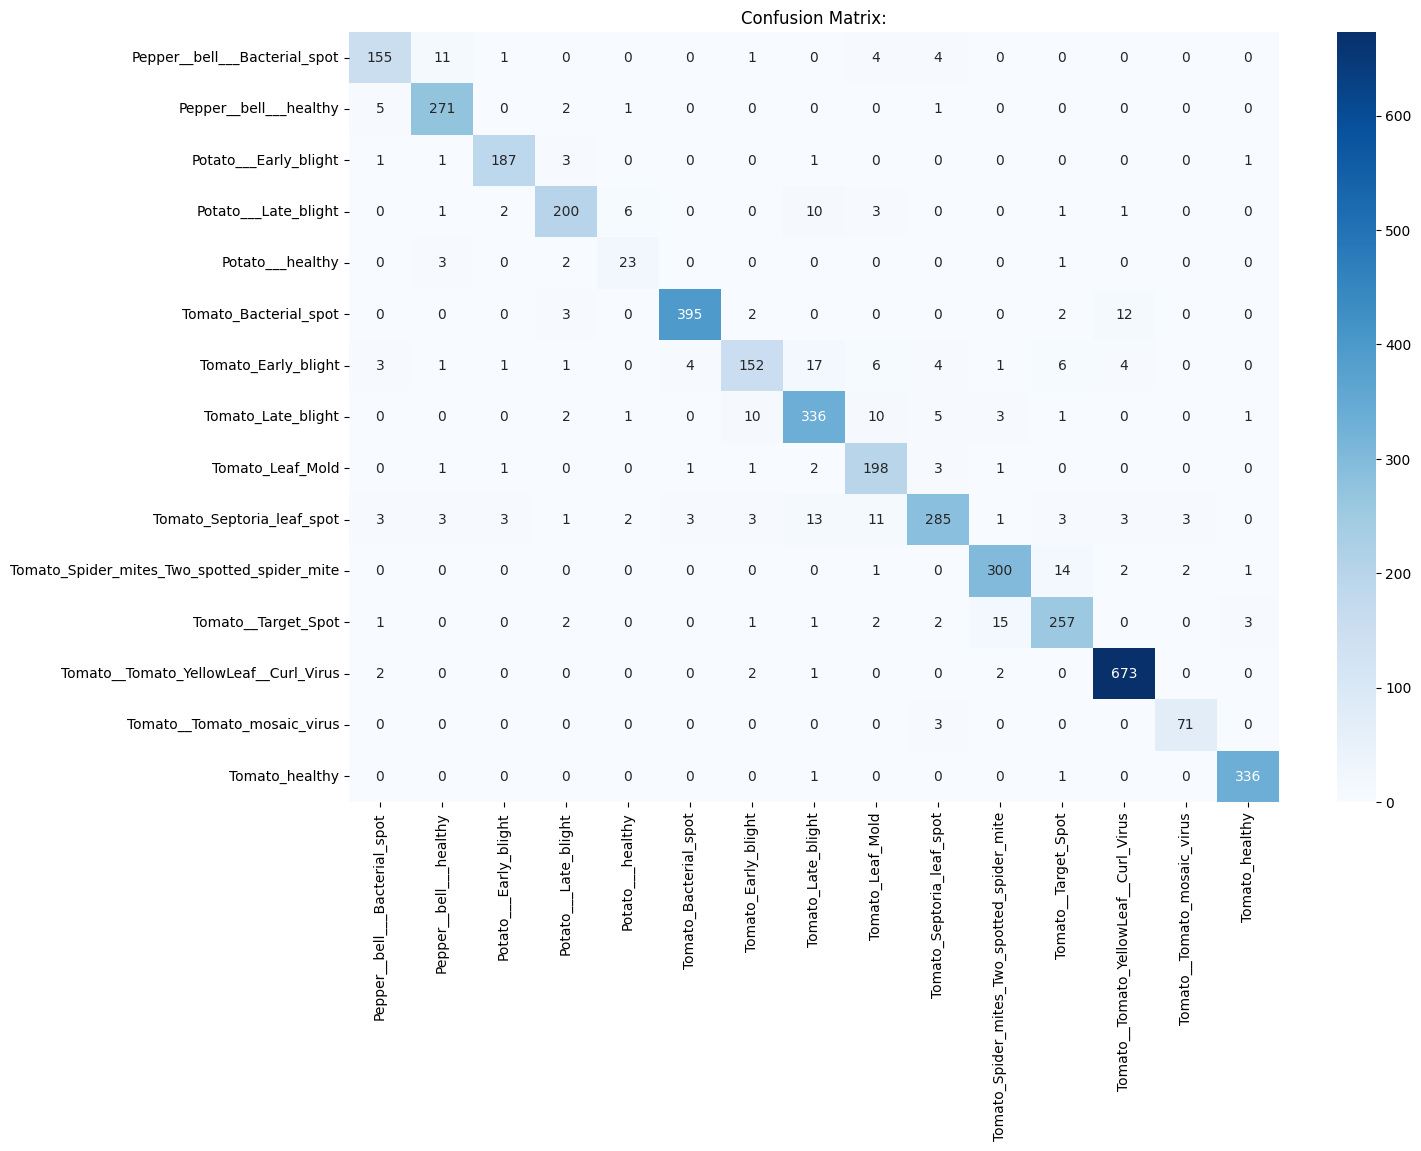



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Predicted Class is: Potato___Early_blight


In [23]:
#lets make dir path for the dataset
dataset_dir = "/kaggle/input/plantdisease/PlantVillage"

#import our tensorflow library here
import tensorflow 

# lets split our dataset into train and test
train_data = tensorflow.keras.utils.image_dataset_from_directory(dataset_dir,
                                                                 validation_split=0.2,
                                                                 subset="training",
                                                                 seed=123,
                                                                 image_size=(128, 128),
                                                                 batch_size=32)
test_data = tensorflow.keras.utils.image_dataset_from_directory(dataset_dir,
                                                                 validation_split=0.2,
                                                                 subset="validation",
                                                                 seed=123,
                                                                 image_size=(128, 128),
                                                                 batch_size=32)

# lets print here the class names
class_name = train_data.class_names
print("Name of class present in dataset\n",class_name)
print("\n")

#importing libraries for scaling data
from tensorflow.keras import layers

# lets here try to normalize that input
autotune = tensorflow.data.AUTOTUNE
scale = layers.Rescaling(1/255)

train_data = train_data.map(lambda x,y: (scale(x),y)).cache().shuffle(1000).prefetch(autotune)
test_data = test_data.map(lambda x,y: (scale(x),y)).cache().prefetch(autotune)


# lets build our NN here
from tensorflow.keras import layers,models

model = models.Sequential([
    layers.Conv2D(32,(3,3), activation="relu",input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(15, activation="softmax")
])

# lets compile our model here
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# here lets fir our model
model_fit = model.fit(train_data, validation_data = test_data,epochs= 10)
print("\n")

# plotting trainiing and validation accuracy graph
plt.figure(figsize=(12,5))
plt.plot(model_fit.history['accuracy'], label='Train')
plt.plot(model_fit.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.legend()
plt.show()

print("\n")
plt.plot(model_fit.history['loss'], label='Train')
plt.plot(model_fit.history['val_loss'], label='Validation')
plt.legend()
plt.title("Model Loss")
plt.show()
print("\n")

# now lets print the accuracy,confusion matrix,precision and recall 
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

y_test = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(model.predict(test_data), axis=1)
print(classification_report(y_test, y_pred, target_names=class_name))
print("\n")

conf_mat = confusion_matrix(y_test,y_pred)

#lets display on heatmap
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.title("Confusion Matrix:")
plt.show()
print("\n")


#now lets do prediction here with input images
from tensorflow.keras.preprocessing import image
# setting the image path
image_p = "/kaggle/input/plantdisease/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG"

img = image.load_img(image_p,  target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

pred_img = model.predict(img_array)
score = tensorflow.nn.softmax(pred_img[0])

pred_class = class_name[np.argmax(score)]
print(f"Predicted Class is: {pred_class}")
